In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from scipy.optimize import minimize
from math import radians, sin, cos, acos, asin, sqrt, atan2, degrees
from scipy.spatial import distance

In [ ]:
pd.set_option('display.max_columns', None)  # Set the maximum number of columns to display to None
pd.set_option('display.max_rows', None)  # Set the maximum number of rows to display to None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/'My Drive'/YVW/628.xlsx .
# Read the data from an Excel file
df1 = pd.read_excel('628.xlsx')
# Print Sensor data
df1.head()

,Job_ID,Actual_Latitude,Actual_Longitude,Estimated_Latitude,Estimated_Longitude,Priority,Euclidean_Distance,Haversine_Distance
0,8084696,-37.759454,145.128055,-37.758825,145.128016,3,0.000630,0.069836
1,8195038,-37.754992,145.124592,-37.754239,145.124588,3,0.000753,0.083586
2,8359922,-37.757701,145.132867,-37.758229,145.133691,2,0.000979,0.093347
3,8231996,-37.757644,145.129883,-37.758627,145.129420,3,0.001086,0.116457
4,8203496,-37.757009,145.130750,-37.756727,145.129492,3,0.001289,0.115185


In [ ]:
!cp /content/drive/'My Drive'/YVW/117.xlsx .
# Read the data from an Excel file
df2 = pd.read_excel('117.xlsx')
# Print Sensor data
df2.head()

,Job_ID,Actual_Latitude,Actual_Longitude,Estimated_Latitude,Estimated_Longitude,Priority,Euclidean_Distance,Haversine_Distance
0,8231996,-37.757644,145.129883,-37.757466,145.130043,3,0.000240,0.024375
1,8314397,-37.761560,145.116026,-37.761636,145.116356,2,0.000339,0.030294
2,8314602,-37.759969,145.125908,-37.760101,145.125557,3,0.000375,0.034192
3,8320074,-37.757297,145.131833,-37.757504,145.131438,3,0.000445,0.041670
4,8092648,-37.758228,145.132048,-37.757595,145.131170,3,0.001083,0.104557


In [ ]:
!cp /content/drive/'My Drive'/YVW/116.xlsx .
# Read the data from an Excel file
df3 = pd.read_excel('116.xlsx')
# Print Sensor data
df3.head()

,Job_ID,Actual_Latitude,Actual_Longitude,Estimated_Latitude,Estimated_Longitude,Priority,Euclidean_Distance,Haversine_Distance
0,8150875,-37.757829,145.126734,-37.757984,145.126904,3,0.000230,0.022831
1,8259300,-37.755354,145.127514,-37.755890,145.127661,3,0.000555,0.060831
2,8082462,-37.757291,145.125430,-37.756751,145.125266,3,0.000565,0.061720
3,8084826,-37.754677,145.143522,-37.754626,145.144348,1,0.000827,0.072977
4,8208781,-37.754504,145.141017,-37.755566,145.140424,3,0.001217,0.128950


In [ ]:
!cp /content/drive/'My Drive'/YVW/104.xlsx .
# Read the data from an Excel file
df4 = pd.read_excel('104.xlsx')
# Print Sensor data
df4.head()

,Job_ID,Actual_Latitude,Actual_Longitude,Estimated_Latitude,Estimated_Longitude,Priority,Euclidean_Distance,Haversine_Distance
0,8084826,-37.754677,145.143522,-37.754470,145.143922,1,0.000450,0.042069
1,8249945,-37.754727,145.128333,-37.755297,145.128086,3,0.000622,0.066944
2,8165583,-37.756080,145.125563,-37.756121,145.126740,2,0.001177,0.103755
3,8231996,-37.757644,145.129883,-37.757314,145.128744,3,0.001186,0.106825
4,8243436,-37.752131,145.130033,-37.752915,145.131272,2,0.001466,0.139593


In [ ]:
!cp /content/drive/'My Drive'/YVW/103.xlsx .
# Read the data from an Excel file
df5 = pd.read_excel('103.xlsx')
# Print Sensor data
df5.head()

,Job_ID,Actual_Latitude,Actual_Longitude,Estimated_Latitude,Estimated_Longitude,Priority,Euclidean_Distance,Haversine_Distance
0,8084696,-37.759454,145.128055,-37.759166,145.128053,3,0.000288,0.031935
1,8249945,-37.754727,145.128333,-37.755468,145.128643,3,0.000803,0.086652
2,8359922,-37.757701,145.132867,-37.758428,145.132299,2,0.000923,0.095019
3,8304950,-37.753659,145.134286,-37.752809,145.133790,2,0.000984,0.103967
4,8231996,-37.757644,145.129883,-37.758233,145.128909,3,0.001138,0.107864


In [ ]:
common_jobs = set(df1['Job_ID']) & set(df2['Job_ID']) & set(df3['Job_ID']) & set(df4['Job_ID']) & set(df5['Job_ID'])
common_jobs = list(common_jobs)

In [ ]:
print(len(common_jobs))

65


In [ ]:
# Filter dataframes by common jobs
df1_common = df1[df1['Job_ID'].isin(common_jobs)]
df2_common = df2[df2['Job_ID'].isin(common_jobs)]
df3_common = df3[df3['Job_ID'].isin(common_jobs)]
df4_common = df4[df4['Job_ID'].isin(common_jobs)]
df5_common = df5[df5['Job_ID'].isin(common_jobs)]

In [ ]:
# Extract necessary columns from each dataframe (Estimated Latitude and Longitude)
df1_relevant = df1_common[['Job_ID', 'Actual_Latitude', 'Actual_Longitude', 'Estimated_Latitude', 'Estimated_Longitude']].rename(
    columns={'Estimated_Latitude': 'Sensor1_Estimated_Lat', 'Estimated_Longitude': 'Sensor1_Estimated_Lon'})
df2_relevant = df2_common[['Job_ID', 'Estimated_Latitude', 'Estimated_Longitude']].rename(
    columns={'Estimated_Latitude': 'Sensor2_Estimated_Lat', 'Estimated_Longitude': 'Sensor2_Estimated_Lon'})
df3_relevant = df3_common[['Job_ID', 'Estimated_Latitude', 'Estimated_Longitude']].rename(
    columns={'Estimated_Latitude': 'Sensor3_Estimated_Lat', 'Estimated_Longitude': 'Sensor3_Estimated_Lon'})
df4_relevant = df4_common[['Job_ID', 'Estimated_Latitude', 'Estimated_Longitude']].rename(
    columns={'Estimated_Latitude': 'Sensor4_Estimated_Lat', 'Estimated_Longitude': 'Sensor4_Estimated_Lon'})
df5_relevant = df5_common[['Job_ID', 'Estimated_Latitude', 'Estimated_Longitude']].rename(
    columns={'Estimated_Latitude': 'Sensor5_Estimated_Lat', 'Estimated_Longitude': 'Sensor5_Estimated_Lon'})




In [ ]:
sensors_list = {
    'Sensor1': (-37.758, 145.118),
    'Sensor2': (-37.758, 145.135),
    'Sensor3': (-37.767, 145.141),
    'Sensor4': (-37.767, 145.119),
    'Sensor5': (-37.768, 145.131)
}

In [ ]:
# Merge the dataframes
merged_df = df1_relevant.merge(df2_relevant, on='Job_ID').merge(df3_relevant, on='Job_ID').merge(
    df4_relevant, on='Job_ID').merge(df5_relevant, on='Job_ID')

merged_df.head()

,Job_ID,Actual_Latitude,Actual_Longitude,Sensor1_Estimated_Lat,Sensor1_Estimated_Lon,Sensor2_Estimated_Lat,Sensor2_Estimated_Lon,Sensor3_Estimated_Lat,Sensor3_Estimated_Lon,Sensor4_Estimated_Lat,Sensor4_Estimated_Lon,Sensor5_Estimated_Lat,Sensor5_Estimated_Lon
0,8084696,-37.759454,145.128055,-37.758825,145.128016,-37.758722,145.129884,-37.757394,145.126359,-37.756693,145.128143,-37.759166,145.128053
1,8195038,-37.754992,145.124592,-37.754239,145.124588,-37.760697,145.124031,-37.756872,145.124342,-37.751263,145.133234,-37.754294,145.126807
2,8359922,-37.757701,145.132867,-37.758229,145.133691,-37.757580,145.130902,-37.758275,145.130933,-37.756383,145.128790,-37.758428,145.132299
3,8231996,-37.757644,145.129883,-37.758627,145.129420,-37.757466,145.130043,-37.757786,145.128299,-37.757314,145.128744,-37.758233,145.128909
4,8203496,-37.757009,145.130750,-37.756727,145.129492,-37.757480,145.135123,-37.758430,145.126890,-37.757544,145.129211,-37.756498,145.128401


In [ ]:
# Haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

# Euclidean distance function
def euclidean_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

In [ ]:
# Calculate distances for each sensor
for sensor, (sensor_lat, sensor_lon) in sensors_list.items():
    estimated_lat_col = f'{sensor}_Estimated_Lat'
    estimated_lon_col = f'{sensor}_Estimated_Lon'

    # Calculate Euclidean and Haversine distances
    merged_df[f'{sensor}_Euclidean'] = euclidean_distance(sensor_lat, sensor_lon, merged_df[estimated_lat_col], merged_df[estimated_lon_col])
    merged_df[f'{sensor}_Haversine'] = haversine(sensor_lat, sensor_lon, merged_df[estimated_lat_col], merged_df[estimated_lon_col])

# Display the resulting DataFrame
print(merged_df.head())

    Job_ID  Actual_Latitude  Actual_Longitude  Sensor1_Estimated_Lat  \
0  8084696       -37.759454        145.128055             -37.758825   
1  8195038       -37.754992        145.124592             -37.754239   
2  8359922       -37.757701        145.132867             -37.758229   
3  8231996       -37.757644        145.129883             -37.758627   
4  8203496       -37.757009        145.130750             -37.756727   

   Sensor1_Estimated_Lon  Sensor2_Estimated_Lat  Sensor2_Estimated_Lon  \
0             145.128016             -37.758722             145.129884   
1             145.124588             -37.760697             145.124031   
2             145.133691             -37.757580             145.130902   
3             145.129420             -37.757466             145.130043   
4             145.129492             -37.757480             145.135123   

   Sensor3_Estimated_Lat  Sensor3_Estimated_Lon  Sensor4_Estimated_Lat  \
0             -37.757394             145.126359 

In [ ]:
sensor_coords = {
    'WMS0117': (-37.758, 145.135),
    'WMS0103': (-37.768, 145.131),
    'WMS0104': (-37.767, 145.119),
    'WMS0116': (-37.767, 145.141),
    'WBS628': (-37.758, 145.118)
}

In [ ]:
pip install geopandas contextily


CLOSEST-SENSOR APPROACH

In [ ]:
import pandas as pd

# Assuming merged_df is your original DataFrame
# Step 1: Create a function to find the shortest distance and corresponding sensor data
def find_shortest_distance(row):
    # Extracting actual coordinates
    actual_lat = row['Actual_Latitude']
    actual_lon = row['Actual_Longitude']

    # Extracting Euclidean distances for all sensors
    distances = [
        row['Sensor1_Euclidean'],
        row['Sensor2_Euclidean'],
        row['Sensor3_Euclidean'],
        row['Sensor4_Euclidean'],
        row['Sensor5_Euclidean']
    ]

    # Finding the minimum distance and the corresponding sensor index
    min_distance = min(distances)
    min_index = distances.index(min_distance)

    # Corresponding sensor coordinates
    sensor_lat = row[f'Sensor{min_index + 1}_Estimated_Lat']
    sensor_lon = row[f'Sensor{min_index + 1}_Estimated_Lon']

    return pd.Series([min_distance, sensor_lat, sensor_lon])

# Step 2: Apply the function to each row in the DataFrame
shortest_distances = merged_df.apply(find_shortest_distance, axis=1)

# Step 3: Create the new DataFrame
result_df = pd.DataFrame({
    'job_id': merged_df['Job_ID'],
    'actual_latitude': merged_df['Actual_Latitude'],
    'actual_longitude': merged_df['Actual_Longitude'],
    'shortest_euclidean_distance': shortest_distances[0],
    'sensor_latitude': shortest_distances[1],
    'sensor_longitude': shortest_distances[2]
})

# Display the resulting DataFrame
print(result_df.head())


    job_id  actual_latitude  actual_longitude  shortest_euclidean_distance  \
0  8084696       -37.759454        145.128055                     0.005167   
1  8195038       -37.754992        145.124592                     0.007586   
2  8359922       -37.757701        145.132867                     0.004120   
3  8231996       -37.757644        145.129883                     0.004985   
4  8203496       -37.757009        145.130750                     0.000534   

   sensor_latitude  sensor_longitude  
0       -37.758722        145.129884  
1       -37.754239        145.124588  
2       -37.757580        145.130902  
3       -37.757466        145.130043  
4       -37.757480        145.135123  


In [ ]:
import matplotlib.pyplot as plt
import contextily as cx
import geopandas as gpd
from shapely.geometry import Point

# Function to plot actual and weighted coordinates with sensors on basemap
def plot_selected_coordinates(df, sensor_coords):
    # Convert dataframe to GeoDataFrame for plotting
    df_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['sensor_longitude'], df['sensor_latitude']), crs='EPSG:4326')

    # Create GeoDataFrame for actual coordinates
    actual_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['actual_longitude'], df['actual_latitude']), crs='EPSG:4326')

    # Create GeoDataFrame for sensor coordinates
    sensor_df = gpd.GeoDataFrame(sensor_coords.items(), columns=['Sensor_Name', 'Coordinates'])
    sensor_df['geometry'] = sensor_df['Coordinates'].apply(lambda x: Point(x[1], x[0]))  # Reversing lat/lon
    sensor_gdf = gpd.GeoDataFrame(sensor_df, geometry='geometry', crs='EPSG:4326')

    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot actual coordinates (green dots)
    actual_gdf.plot(ax=ax, color='green', label='Actual Coordinates')

    # Plot weighted coordinates (blue dots)
    df_gdf.plot(ax=ax, color='blue', label='Best Coordinates')

    # Plot sensor coordinates (red dots)
    sensor_gdf.plot(ax=ax, color='red', label='Sensors', markersize=50)

    # Add labels for actual coordinates (Job_IDs)
    for x, y, label in zip(actual_gdf.geometry.x, actual_gdf.geometry.y, df['job_id']):
        ax.text(x, y, label, color='black', fontsize=10)

    # Add labels for sensor names
    for x, y, label in zip(sensor_gdf.geometry.x, sensor_gdf.geometry.y, sensor_gdf['Sensor_Name']):
        ax.text(x, y, label, color='red', fontsize=10)

    # Plot lines connecting actual and weighted coordinates
    for i in range(len(df)):
        ax.plot([actual_gdf.geometry.x.iloc[i], df_gdf.geometry.x.iloc[i]],
                [actual_gdf.geometry.y.iloc[i], df_gdf.geometry.y.iloc[i]], color='grey', linestyle='-', linewidth=1)

    # Add basemap using Contextily
    cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

    # Set axis labels and title
    ax.set_title('Estimated vs Actual Coordinates with Sensors')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()

    plt.show()



<ipython-input-39-0f70e6fee49f>:16: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  sensor_df['geometry'] = sensor_df['Coordinates'].apply(lambda x: Point(x[1], x[0]))  # Reversing lat/lon


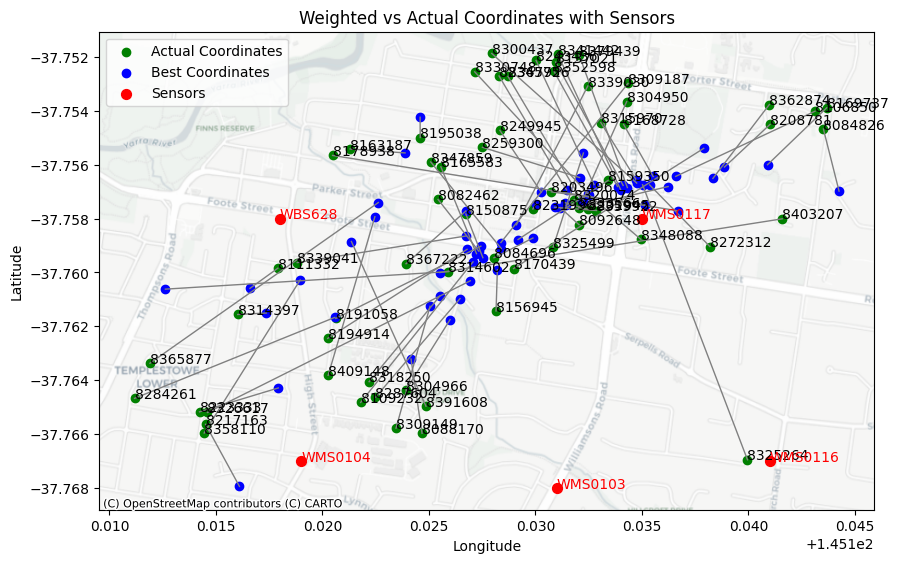

In [ ]:
plot_selected_coordinates(result_df,sensor_coords)

In [ ]:
def plot_segments_coordinates(sorted_df, sensor_coords, rows_per_plot=30):
    num_rows = sorted_df.shape[0]
    num_plots = (num_rows + rows_per_plot - 1) // rows_per_plot  # Calculate the number of plots needed

    # Create GeoDataFrame for sensor coordinates
    sensor_df = gpd.GeoDataFrame(sensor_coords.items(), columns=['Sensor_Name', 'Coordinates'])
    sensor_df['geometry'] = sensor_df['Coordinates'].apply(lambda x: Point(x[1], x[0]))  # Reversing lat/lon
    sensor_gdf = gpd.GeoDataFrame(sensor_df, geometry='geometry', crs='EPSG:4326')

    # Iterate through the dataframe in chunks of `rows_per_plot`
    for plot_idx in range(num_plots):
        start = plot_idx * rows_per_plot
        end = min((plot_idx + 1) * rows_per_plot, num_rows)
        df_slice = sorted_df.iloc[start:end].copy()

        # Convert dataframe to GeoDataFrame for plotting
        df_gdf = gpd.GeoDataFrame(df_slice, geometry=gpd.points_from_xy(df_slice['sensor_longitude'], df_slice['sensor_latitude']), crs='EPSG:4326')

        # Create GeoDataFrame for actual coordinates
        actual_gdf = gpd.GeoDataFrame(df_slice, geometry=gpd.points_from_xy(df_slice['actual_longitude'], df_slice['actual_latitude']), crs='EPSG:4326')

        # Plot
        fig, ax = plt.subplots(figsize=(10, 10))

        # Plot actual coordinates (green dots)
        actual_gdf.plot(ax=ax, color='green', label='Actual', markersize=30)

        # Plot weighted coordinates (blue dots)
        df_gdf.plot(ax=ax, color='blue', label='Estimated', markersize=30)

        # Plot sensor coordinates (red dots)
        sensor_gdf.plot(ax=ax, color='red', label='Sensors', markersize=30)

        # Add labels for actual coordinates (Job_IDs)
        for x, y, label in zip(actual_gdf.geometry.x, actual_gdf.geometry.y, df_slice['job_id']):
            ax.text(x, y, label, color='black', fontsize=6)

        # Add labels for sensor names
        for x, y, label in zip(sensor_gdf.geometry.x, sensor_gdf.geometry.y, sensor_gdf['Sensor_Name']):
            ax.text(x, y, label, color='red', fontsize=10)

        # Plot lines connecting actual and weighted coordinates
        for i in range(len(df_slice)):
            ax.plot([actual_gdf.geometry.x.iloc[i], df_gdf.geometry.x.iloc[i]],
                    [actual_gdf.geometry.y.iloc[i], df_gdf.geometry.y.iloc[i]], color='grey', linestyle='-', linewidth=1)

        # Add basemap using Contextily
        cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs='EPSG:4326')

        # Set axis labels and title
        ax.set_title(f'Estimated vs Actual Coordinates with Sensors (Rows {start + 1} to {end})')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend()

        plt.show()

<ipython-input-56-52fc9f26958c>:7: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  sensor_df['geometry'] = sensor_df['Coordinates'].apply(lambda x: Point(x[1], x[0]))  # Reversing lat/lon


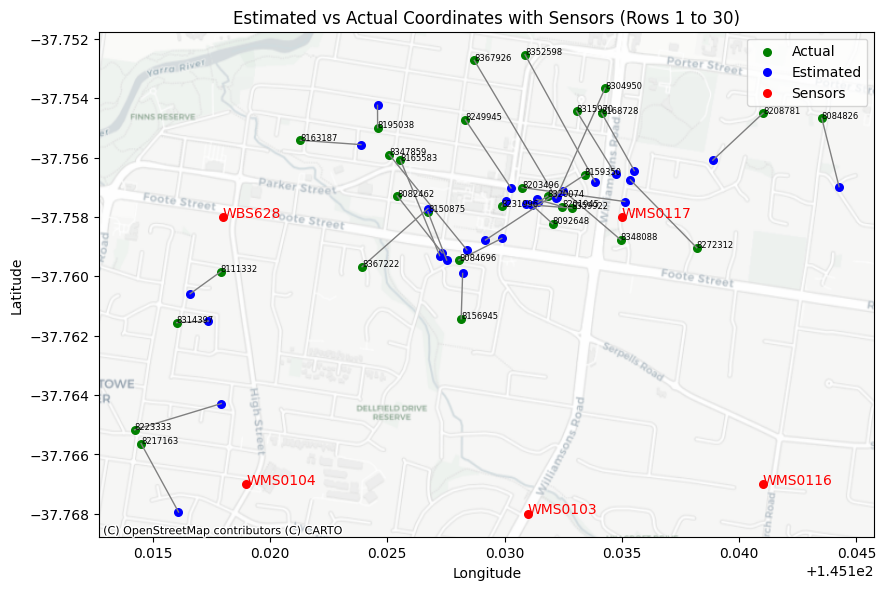

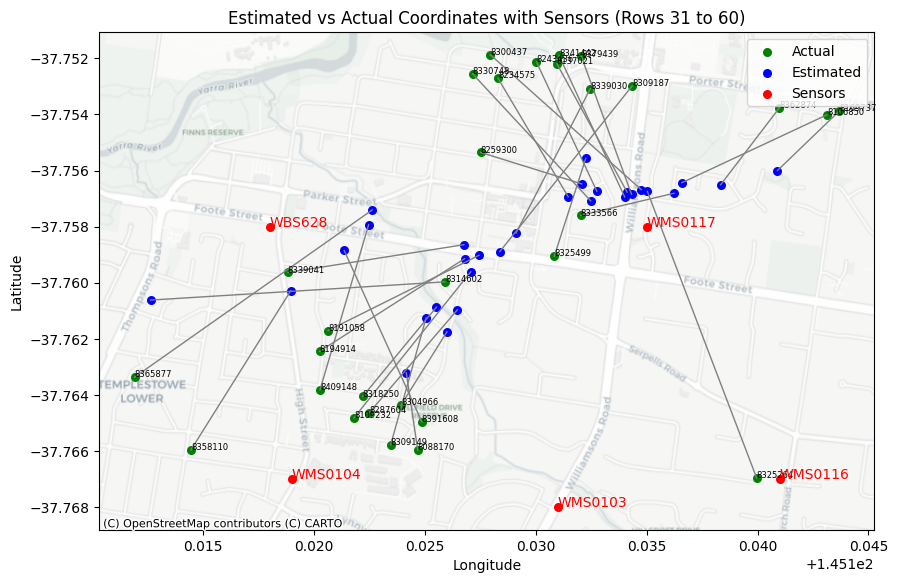

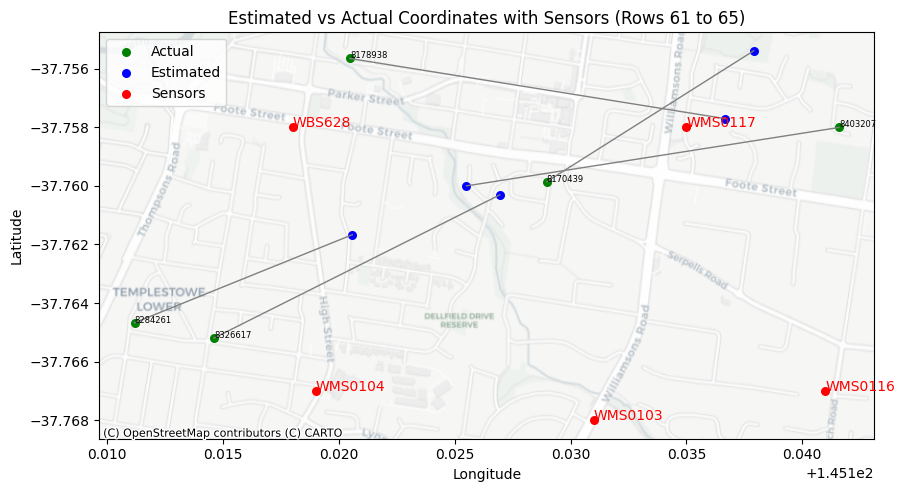

In [ ]:
plot_segments_coordinates(result_df,sensor_coords)

In [ ]:
import numpy as np

# Function to calculate RMSE between actual and predicted coordinates
def calculate_best_rmse(df, actual_lat_col, actual_lon_col, pred_lat_col, pred_lon_col):
    return np.sqrt(np.mean((df[actual_lat_col] - df[pred_lat_col])**2 + (df[actual_lon_col] - df[pred_lon_col])**2))

# Calculate RMSE
rmse = calculate_best_rmse(result_df, 'actual_latitude', 'actual_longitude', 'sensor_latitude', 'sensor_longitude')


In [ ]:
print(rmse)

0.006332353259232534


In [ ]:
# Function to calculate mean Haversine distance between actual and predicted coordinates
def calculate_mean_haversine(df, actual_lat_col, actual_lon_col, pred_lat_col, pred_lon_col):
    haversine_distances = []
    for idx, row in df.iterrows():
        actual = (row[actual_lat_col], row[actual_lon_col])
        predicted = (row[pred_lat_col], row[pred_lon_col])
        haversine_distances.append(geodesic(actual, predicted).kilometers)
    return np.mean(haversine_distances)

# Function to calculate mean Euclidean distance between actual and predicted coordinates
def calculate_mean_euclidean(df, actual_lat_col, actual_lon_col, pred_lat_col, pred_lon_col):
    euclidean_distances = []
    for idx, row in df.iterrows():
        actual_lat = row[actual_lat_col]
        actual_lon = row[actual_lon_col]
        predicted_lat = row[pred_lat_col]
        predicted_lon = row[pred_lon_col]
        euclidean_distances.append(np.sqrt((actual_lat - predicted_lat)**2 + (actual_lon - predicted_lon)**2))
    return np.mean(euclidean_distances)

In [ ]:
from geopy.distance import geodesic
haversine = calculate_mean_haversine(result_df, 'actual_latitude', 'actual_longitude', 'sensor_latitude', 'sensor_longitude')

In [ ]:
print(haversine)

0.5089648088723222


In [ ]:
euclidean = calculate_mean_euclidean(result_df, 'actual_latitude', 'actual_longitude', 'sensor_latitude', 'sensor_longitude')

In [ ]:
print(euclidean)

0.005229570876145087


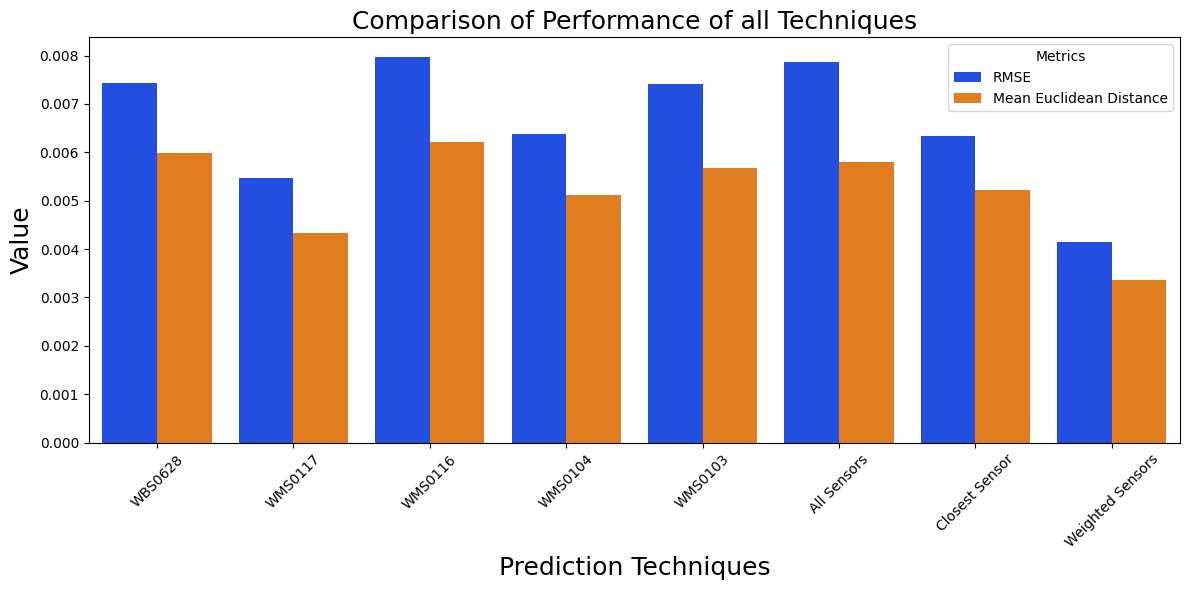

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the provided data
data = {
    'Sensor': ['WBS0628', 'WMS0117', 'WMS0116', 'WMS0104', 'WMS0103',
               'All Sensors', 'Closest Sensor', 'Weighted Sensors'],
    'RMSE': [0.007428, 0.005463, 0.007978, 0.006385, 0.007408,
             0.007865, 0.006332, 0.004141],
    'Mean Euclidean Distance': [0.005978, 0.004340, 0.006217,
                                 0.005118, 0.005686,
                                 0.005809, 0.005229, 0.003371]
}

df = pd.DataFrame(data)

# Reshape the DataFrame to long format
df_melted = df.melt(id_vars='Sensor',
                    var_name='Metric',
                    value_name='Value')

# Set the color palette
sns.set_palette("bright")

# Create the grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sensor', y='Value', hue='Metric', data=df_melted)

# Add titles and labels
plt.title('Comparison of Performance of all Techniques',fontsize = "18")
plt.ylabel('Value', fontsize = "18")
plt.xlabel('Prediction Techniques', fontsize = "18")
plt.xticks(rotation=45)
plt.legend(title='Metrics')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
